In [1]:
from movie_recommand import MovieRecommender
import pandas as pd
import numpy as np

In [7]:
# Cell 2: Data Loading and Preprocessing
# First examine the data
movies_df = pd.read_csv("movies.csv")
print("Original genres dtype:", movies_df["genres"].dtype)
print("\nSample genres:")
print(movies_df["genres"].head())

Original genres dtype: object

Sample genres:
0    Adventure|Animation|Children|Comedy|Fantasy
1                     Adventure|Children|Fantasy
2                                 Comedy|Romance
3                           Comedy|Drama|Romance
4                                         Comedy
Name: genres, dtype: object


In [3]:
class MovieRecommenderFixed(MovieRecommender):
    def preprocess_data(self):
        """
        Override preprocess_data with proper string handling
        """
        # Ensure genres are strings
        self.movies_df["genres"] = self.movies_df["genres"].fillna("")
        self.movies_df["genres"] = self.movies_df["genres"].astype(str)

        # Split genres and create dummies
        genre_list = self.movies_df["genres"].str.split("|")
        self.genre_dummies = (
            pd.get_dummies(pd.DataFrame(genre_list.tolist()).stack())
            .groupby(level=0)
            .sum()
        )

        # Merge ratings with movie data
        self.full_data = pd.merge(self.ratings_df, self.movies_df, on="movieId")

        print("Data preprocessing completed")
        self._plot_rating_distribution()

Data preprocessing completed


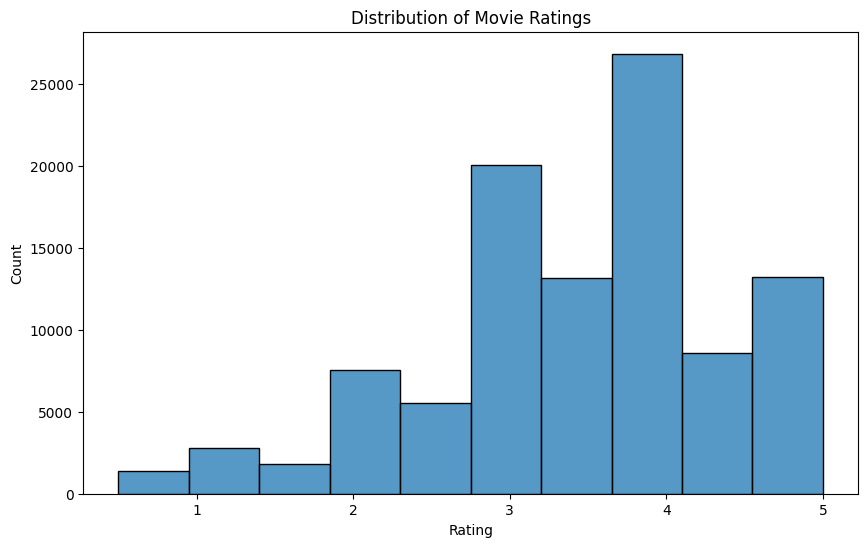

Data preprocessing completed


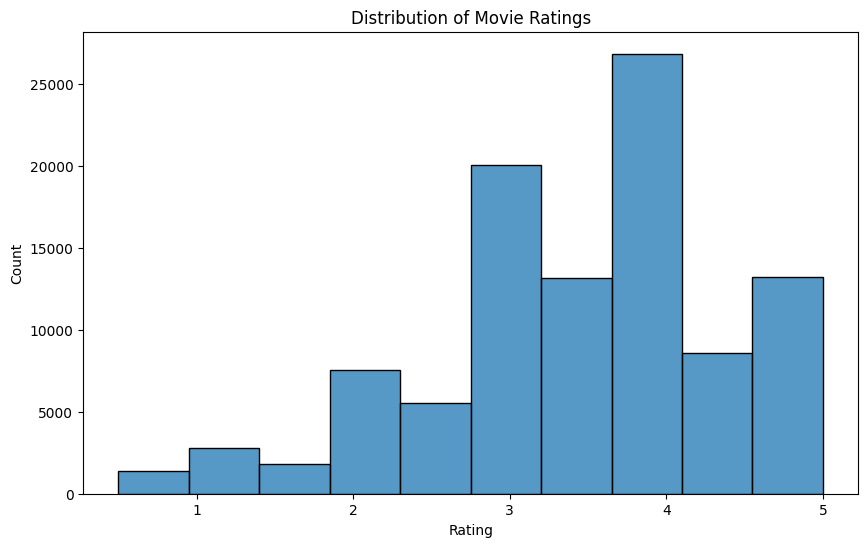

Cosine similarity model built
SVD model built
NCF model built
RNN model built
All models trained successfully


In [4]:
# Create the recommender instance
recommender = MovieRecommenderFixed("ratings.csv", "movies.csv")

# First create the user-movie matrix from ratings
ratings_df = pd.read_csv("ratings.csv")
recommender.ratings_df = ratings_df
recommender.user_movie_matrix = ratings_df.pivot(
	index='userId', 
	columns='movieId', 
	values='rating'
).fillna(0)

# Now proceed with preprocessing and training
recommender.preprocess_data()
recommender.train_model()

In [5]:
def get_recommendations(movie_title, n_recommendations=5):
    matches = recommender.movies_df[
        recommender.movies_df["title"].str.contains(movie_title, case=False)
    ]
    if matches.empty:
        return "Movie not found"

    movie_id = matches.index[0]
    return recommender.get_recommendations(
        user_id=1, model_name="star war", n_recommendations=n_recommendations
    )

In [6]:
# Cell 6: Test Recommendations
test_movie = "Toy Story"
n_recommendations = 5

# Find movies that match the test_movie title
matches = recommender.movies_df[
    recommender.movies_df["title"].str.contains(test_movie, case=False, na=False)
]

if matches.empty:
    print(f"Movie '{test_movie}' not found in the dataset.")
else:
    # Optionally, display the matched movie information
    matched_movie = matches.iloc[0]
    print(f"Found movie: {matched_movie['title']} (Genres: {matched_movie['genres']})")

    # Specify the user ID for whom you want to get recommendations
    user_id = 1  # You can change this to any valid user ID in your dataset

    # Get recommendations without the 'movie_id' argument
    recommendations = recommender.get_recommendations(
        user_id=user_id,
        model_name="svd",  # You can choose 'cosine' or other models if implemented
        n_recommendations=n_recommendations,
    )

    print(f"\nTop {n_recommendations} Recommendations for User ID {user_id}:")
    print(recommendations)

Found movie: Toy Story (1995) (Genres: Adventure|Animation|Children|Comedy|Fantasy)

Top 5 Recommendations for User ID 1:
                                                 title  \
899                         Princess Bride, The (1987)   
989                      Some Kind of Wonderful (1987)   
910  Once Upon a Time in the West (C'era una volta ...   
224          Star Wars: Episode IV - A New Hope (1977)   
897              Cheech and Chong's Up in Smoke (1978)   

                                      genres  
899  Action|Adventure|Comedy|Fantasy|Romance  
989                            Drama|Romance  
910                     Action|Drama|Western  
224                  Action|Adventure|Sci-Fi  
897                                   Comedy  
